# Exploratory Data Analysis of A Year's Pizza Sales
This project analyses a year's worth of sales from anonymised pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# create dataframes from csv files

orders_df = pd.read_csv("orders.csv")
order_details_df = pd.read_csv("order_details.csv")
pizza_types_df = pd.read_csv("pizza_types.csv", encoding ='latin1')
pizzas_df = pd.read_csv("pizzas.csv")

## Ensure data is clean 

### Check orders_df for na and invalid values

In [3]:

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [4]:
orders_df['date'] = pd.to_datetime(orders_df['date'])
orders_df['hour'] = pd.to_datetime(orders_df['time']).dt.hour
orders_df['day'] = pd.to_datetime(orders_df['date'], format='%Y-%M-%D').dt.day_name()
orders_df['month'] = pd.to_datetime(orders_df['date'], format='%Y-%M-%D').dt.month_name()
orders_df['month_num'] = pd.to_datetime(orders_df['date'], format='%Y-%M-%D').dt.month

In [5]:
orders_df.head()

,order_id,date,time,hour,day,month,month_num
0,1,2015-01-01,11:38:36,11,Thursday,January,1
1,2,2015-01-01,11:57:40,11,Thursday,January,1
2,3,2015-01-01,12:12:28,12,Thursday,January,1
3,4,2015-01-01,12:16:31,12,Thursday,January,1
4,5,2015-01-01,12:21:30,12,Thursday,January,1


In [6]:
orders_df['date'].value_counts()

date
2015-11-27    115
2015-11-26    113
2015-10-15    107
2015-07-04    105
2015-05-15     94
             ... 
2015-03-22     37
2015-02-22     37
2015-12-27     35
2015-12-30     32
2015-12-29     27
Name: count, Length: 358, dtype: int64

In [7]:
orders_df['time'].value_counts()

time
18:49:37    6
18:49:15    5
13:05:06    5
20:05:12    5
17:50:15    5
           ..
12:11:39    1
16:52:12    1
15:29:05    1
12:31:54    1
22:09:54    1
Name: count, Length: 16382, dtype: int64

### Check order_details_df for null and invalid values

In [8]:
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
order_details_df['order_details_id'].value_counts()

order_details_id
1        1
32418    1
32409    1
32410    1
32411    1
        ..
16209    1
16210    1
16211    1
16212    1
48620    1
Name: count, Length: 48620, dtype: int64

In [10]:
order_details_df['order_id'].value_counts()

order_id
18845    21
10760    21
18280    15
21158    15
17464    15
         ..
10351     1
10355     1
10357     1
10360     1
21350     1
Name: count, Length: 21350, dtype: int64

In [11]:
order_details_df['pizza_id'].value_counts()

pizza_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

In [12]:
order_details_df['quantity'].value_counts()


quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

### Check pizza_df for null and invalid data

In [13]:

pizzas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [14]:
pizzas_df['pizza_id'].value_counts()

pizza_id
bbq_ckn_s         1
bbq_ckn_m         1
five_cheese_m     1
five_cheese_s     1
spinach_supr_l    1
                 ..
ital_cpcllo_l     1
ital_cpcllo_m     1
ital_cpcllo_s     1
hawaiian_l        1
veggie_veg_l      1
Name: count, Length: 96, dtype: int64

In [15]:
pizzas_df['pizza_type_id'].value_counts()


pizza_type_id
the_greek       5
bbq_ckn         3
peppr_salami    3
spinach_fet     3
spin_pesto      3
mexicana        3
mediterraneo    3
ital_veggie     3
green_garden    3
four_cheese     3
five_cheese     3
spinach_supr    3
spicy_ital      3
soppressata     3
sicilian        3
prsc_argla      3
ital_supr       3
cali_ckn        3
calabrese       3
pepperoni       3
pep_msh_pep     3
napolitana      3
ital_cpcllo     3
hawaiian        3
classic_dlx     3
big_meat        3
thai_ckn        3
southw_ckn      3
ckn_pesto       3
ckn_alfredo     3
veggie_veg      3
brie_carre      1
Name: count, dtype: int64

In [16]:
pizzas_df['size'].value_counts()


size
S      32
M      31
L      31
XL      1
XXL     1
Name: count, dtype: int64

In [17]:
pizzas_df['price'].value_counts()

price
20.75    13
12.00    10
16.00    10
12.50     9
16.50     8
20.25     7
16.75     7
12.75     7
20.50     5
12.25     2
16.25     2
13.25     1
17.95     1
14.75     1
11.75     1
18.50     1
15.50     1
23.65     1
11.00     1
35.95     1
25.50     1
15.25     1
10.50     1
9.75      1
17.50     1
14.50     1
21.00     1
Name: count, dtype: int64

### Check pizza_types_df for null and invalid values

In [18]:
pizza_types_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


## Merge dataframes


In [19]:
orders_and_details =pd.merge(orders_df, order_details_df, on ='order_id', how ='left')
orders_to_pizza = pd.merge(orders_and_details, pizzas_df, on = 'pizza_id', how ='left')
master_df = pd.merge(orders_to_pizza, pizza_types_df, on = 'pizza_type_id', how ='left')

In [20]:
master_df

,order_id,date,time,hour,day,month,month_num,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,11,Thursday,January,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,11,Thursday,January,1,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,11,Thursday,January,1,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,11,Thursday,January,1,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,11,Thursday,January,1,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,21,Thursday,December,12,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,21,Thursday,December,12,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,21,Thursday,December,12,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,22,Thursday,December,12,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


# Analysis

1.	What is the total revenue/sales?

In [21]:
revenue_per_sale =master_df['quantity']*master_df['price']
total_revenue = revenue_per_sale.sum()
print(f"The total revenue is ${total_revenue}")

The total revenue is $817860.05


2.	Find the total quantity sold

In [22]:
total_quantity = master_df['quantity'].sum()
print(f"The total number of pizzas sold is {total_quantity}")

The total number of pizzas sold is 49574


3.	Find the total orders.

In [23]:
print(f"There were {master_df['order_id'].nunique()} orders made in total")

There were 21350 orders made in total


4.	How many pizza types do they sell?

In [24]:
master_df['pizza_type_id'].nunique()

32

5.	Find the average price of the pizzas.

In [25]:
print(f"The average price of pizzas is ${round(master_df['price'].mean(), 2)}")

The average price of pizzas is $16.49


6.	What are the peak hours of sales?

<function matplotlib.pyplot.show(close=None, block=None)>

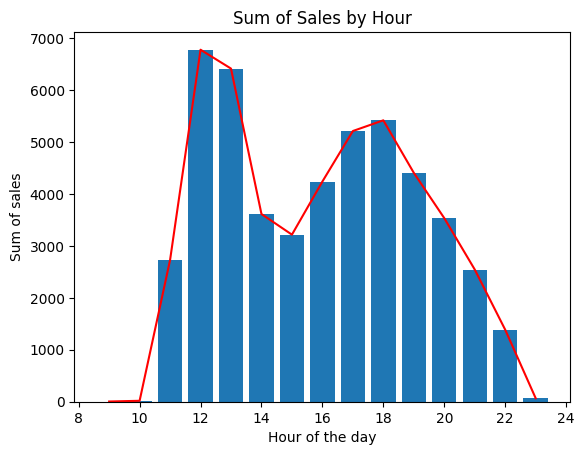

In [26]:

sales_per_hour = master_df.groupby('hour')['quantity'].sum().reset_index()
sales_per_hour
plt.figure()
plt.bar(sales_per_hour['hour'],sales_per_hour['quantity'])
plt.plot(sales_per_hour['hour'],sales_per_hour['quantity'], color ='red')
plt.xlabel('Hour of the day')
plt.ylabel('Sum of sales')
plt.title('Sum of Sales by Hour')
plt.show

Insights: There are two daily sales peaks. The major peak at 12 noon and the other peak at 18.00hrs

7.	Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

<function matplotlib.pyplot.show(close=None, block=None)>

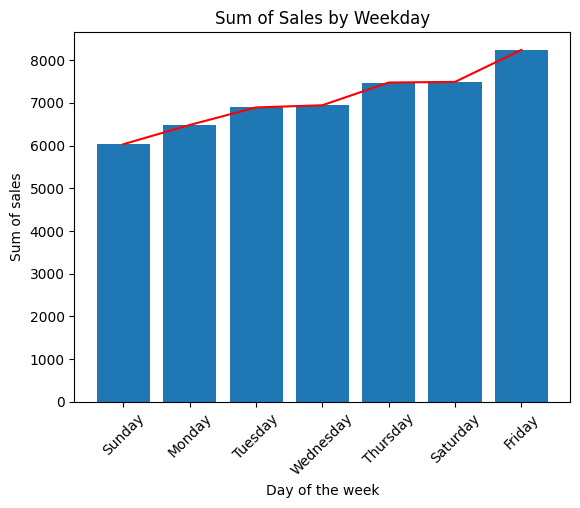

In [27]:
sales_per_weekday = master_df.groupby('day')['quantity'].sum().sort_values().reset_index()
plt.axes()
plt.bar(sales_per_weekday['day'],sales_per_weekday['quantity'])
plt.plot(sales_per_weekday['day'],sales_per_weekday['quantity'], color ='red')
plt.xlabel('Day of the week')
plt.ylabel('Sum of sales')
plt.title('Sum of Sales by Weekday')
plt.xticks(rotation=45)
plt.show

Insight: Sales showed an upward trend peaking on Friday. Customers ordered pizzas least on Sundays.

8.	Find the top 5 bestselling pizzas.

In [28]:
pizza_sales= master_df.groupby('name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head()
pizza_sales

,name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371


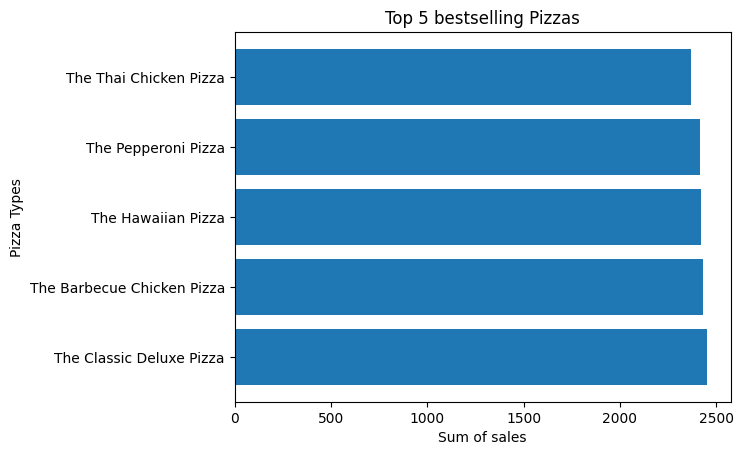

In [29]:
plt.axes()
plt.barh(pizza_sales['name'],pizza_sales['quantity'])
plt.title('Top 5 bestselling Pizzas')
plt.ylabel('Pizza Types')
plt.xlabel('Sum of sales')
plt.show()

The chart above shows customers most ordered pizzas for the year

9.	Find the sales made in each month. Any trend noticeable?

<function matplotlib.pyplot.show(close=None, block=None)>

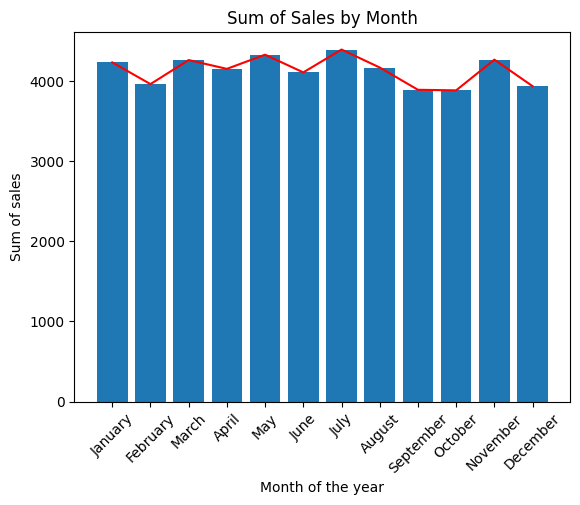

In [30]:
sales_per_month = master_df.groupby(['month_num','month'])['quantity'].sum().reset_index().sort_values('month_num')
plt.axes()
plt.bar(sales_per_month['month'],sales_per_month['quantity'])
plt.plot(sales_per_month['month'],sales_per_month['quantity'], color ='red')
plt.xlabel('Month of the year')
plt.ylabel('Sum of sales')
plt.title('Sum of Sales by Month')
plt.xticks(rotation=45)
plt.show

Insight: Sales were stable throughout the year.

10.	Are there pizza types that are not doing well on the menu?

In [31]:
all_pizza_sales =  master_df.groupby('name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=True)
poor_pizza_sales = all_pizza_sales[all_pizza_sales['quantity']<1000]
poor_pizza_sales

,name,quantity
2,The Brie Carre Pizza,490
16,The Mediterranean Pizza,934
3,The Calabrese Pizza,937
28,The Spinach Supreme Pizza,950
24,The Soppressata Pizza,961
27,The Spinach Pesto Pizza,970
6,The Chicken Pesto Pizza,973
15,The Italian Vegetables Pizza,981
5,The Chicken Alfredo Pizza,987
11,The Green Garden Pizza,997


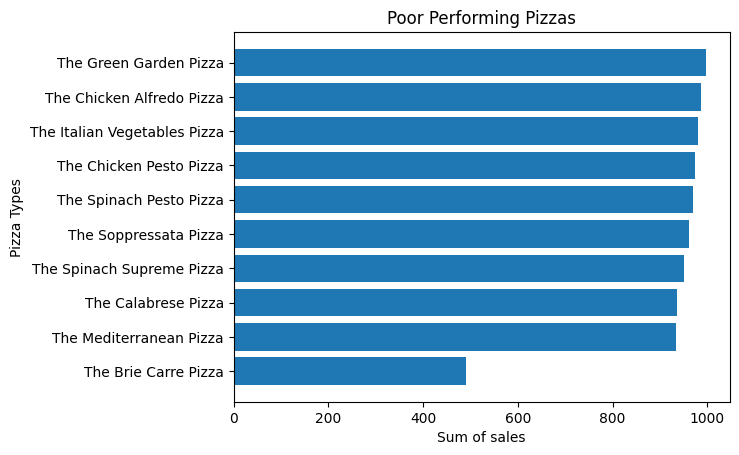

In [32]:
plt.axes()
plt.barh(poor_pizza_sales['name'],poor_pizza_sales['quantity'])
plt.title('Poor Performing Pizzas')
plt.ylabel('Pizza Types')
plt.xlabel('Sum of sales')
plt.show()

Insight:
Company policy defines poor sales for any of it's offerings as annual sales below 1000 units. Hence, further investigation is recommended to ascertain causes of low sales for the 10 poorly performing pizzas.